In [38]:
# all necessary pakage

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv(r'C:\Users\Minfy.DESKTOP-3E50D5N\Documents\student_project\student_social_media\Students_social_media.csv')
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [40]:
# basic information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [41]:
# column wise nan value 
df.isna().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

In [42]:
# check duplicate data
df.duplicated().sum() # no duplicate values -> np.int64(0)

np.int64(0)

In [52]:
df.drop(columns=['Student_ID'],inplace=True)

KeyError: "['Student_ID'] not found in axis"

In [53]:
# numeric data column
num_col = df.select_dtypes(include=['number']).columns
print(num_col)

# categorical data column

cat_col = df.select_dtypes(include=['object','category']).columns
print(cat_col)

Index(['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')
Index(['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Relationship_Status'],
      dtype='object')


In [54]:
for val in cat_col:
    print(df[val].value_counts())
    print('-----------------------------------------')

Gender
Female    353
Male      352
Name: count, dtype: int64
-----------------------------------------
Academic_Level
Undergraduate    353
Graduate         325
High School       27
Name: count, dtype: int64
-----------------------------------------
Country
India          53
USA            40
Canada         34
France         27
Mexico         27
               ..
Oman            1
Afghanistan     1
Syria           1
Yemen           1
Bhutan          1
Name: count, Length: 110, dtype: int64
-----------------------------------------
Most_Used_Platform
Instagram    249
TikTok       154
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      21
WeChat        15
Snapchat      13
VKontakte     12
LINE          12
KakaoTalk     12
YouTube       10
Name: count, dtype: int64
-----------------------------------------
Affects_Academic_Performance
Yes    453
No     252
Name: count, dtype: int64
-----------------------------------------
Relationship_Status
Single             384
In Relation

In [55]:
df.describe()

,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


# Univariant analyis

In [56]:
df['Age'].describe()


count    705.000000
mean      20.659574
std        1.399217
min       18.000000
25%       19.000000
50%       21.000000
75%       22.000000
max       24.000000
Name: Age, dtype: float64

<Axes: ylabel='Age'>

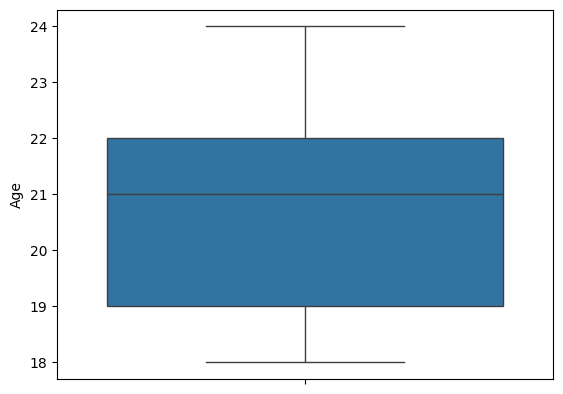

In [57]:
sns.boxplot(df['Age'])

In [58]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

print("Outliers in Age column:")
print(outliers[['Age']])


Outliers in Age column:
Empty DataFrame
Columns: [Age]
Index: []


In [59]:
num_col

Index(['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')


--- Age ---
count    705.000000
mean      20.659574
std        1.399217
min       18.000000
25%       19.000000
50%       21.000000
75%       22.000000
max       24.000000
Name: Age, dtype: float64


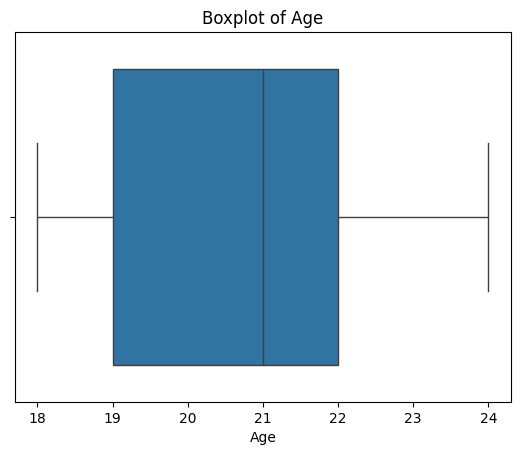


--- Avg_Daily_Usage_Hours ---
count    705.000000
mean       4.918723
std        1.257395
min        1.500000
25%        4.100000
50%        4.800000
75%        5.800000
max        8.500000
Name: Avg_Daily_Usage_Hours, dtype: float64


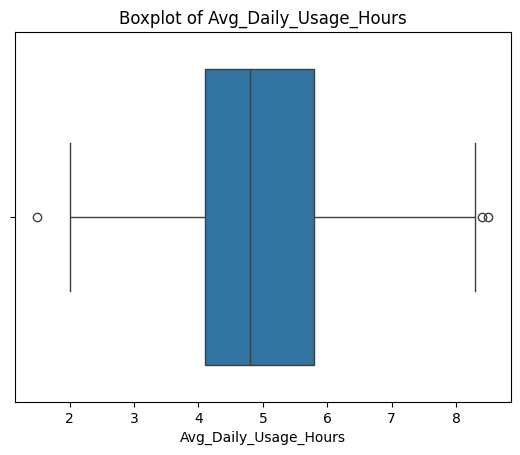


--- Sleep_Hours_Per_Night ---
count    705.000000
mean       6.868936
std        1.126848
min        3.800000
25%        6.000000
50%        6.900000
75%        7.700000
max        9.600000
Name: Sleep_Hours_Per_Night, dtype: float64


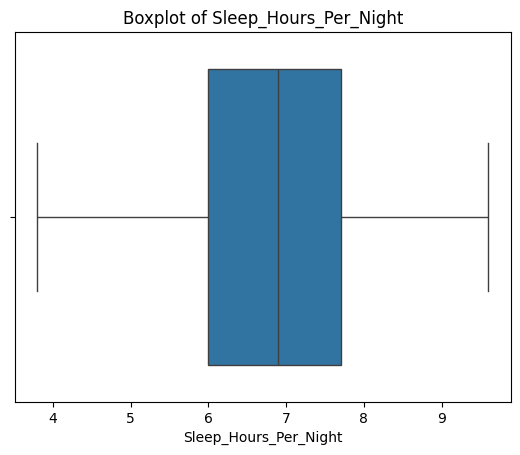


--- Mental_Health_Score ---
count    705.000000
mean       6.226950
std        1.105055
min        4.000000
25%        5.000000
50%        6.000000
75%        7.000000
max        9.000000
Name: Mental_Health_Score, dtype: float64


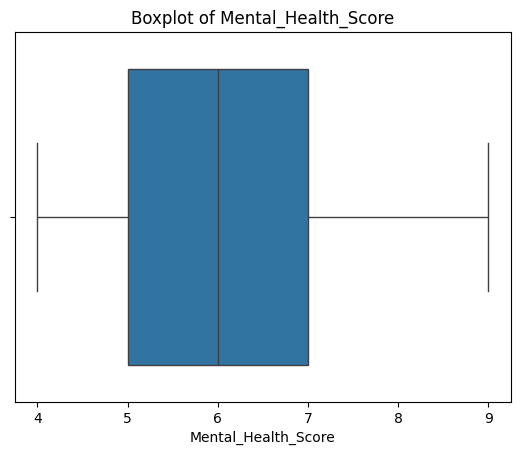


--- Conflicts_Over_Social_Media ---
count    705.000000
mean       2.849645
std        0.957968
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Conflicts_Over_Social_Media, dtype: float64


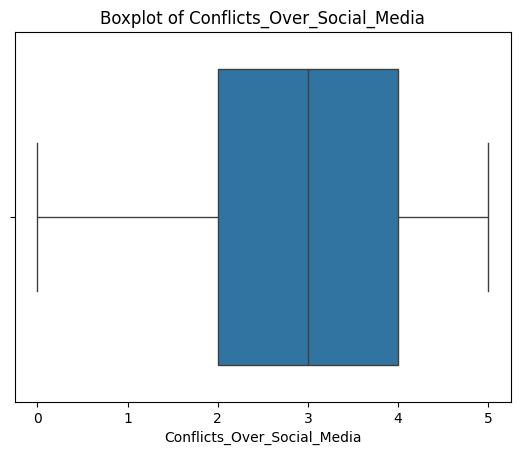


--- Addicted_Score ---
count    705.000000
mean       6.436879
std        1.587165
min        2.000000
25%        5.000000
50%        7.000000
75%        8.000000
max        9.000000
Name: Addicted_Score, dtype: float64


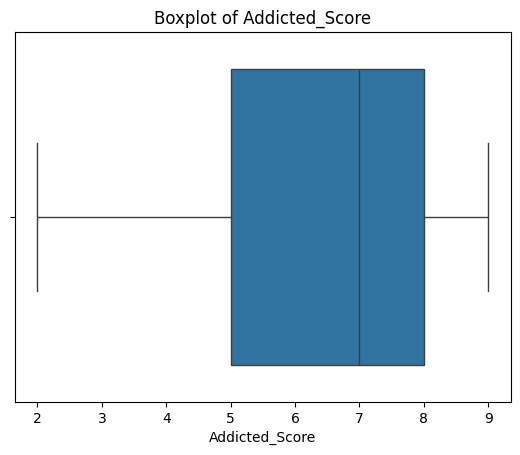

In [ ]:
# for col in num_col:
#     description = df[col].describe()
#     print(description)
#     sns.boxplot(df[col])
#     plt.show()
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1

#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

#     print(f"Outliers in {df[col]} column: ")
#     print(outliers[[col]].sum())
    

import seaborn as sns
import matplotlib.pyplot as plt

num_col = df.select_dtypes(include=['number']).columns  
for col in num_col:
    print(f"\n--- {col} ---")
    description = df[col].describe()
    print(description)

    # Boxplot
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

    


In [67]:
# detect outlier 
# Detect and conditionally treat outliers
for col in num_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = outliers.shape[0]

    print(f"Column: '{col}'")
    print(f"Outlier count: {outlier_count}")

    # Only apply Winsorization if outliers are present
    if outlier_count > 0:
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
        print(f"✅ Winsorization applied to '{col}'\n")
    else:
        print(f"ℹ️ No outliers detected in '{col}', Winsorization skipped.\n")


Column: 'Age'
Outlier count: 0
ℹ️ No outliers detected in 'Age', Winsorization skipped.

Column: 'Avg_Daily_Usage_Hours'
Outlier count: 3
✅ Winsorization applied to 'Avg_Daily_Usage_Hours'

Column: 'Sleep_Hours_Per_Night'
Outlier count: 0
ℹ️ No outliers detected in 'Sleep_Hours_Per_Night', Winsorization skipped.

Column: 'Mental_Health_Score'
Outlier count: 0
ℹ️ No outliers detected in 'Mental_Health_Score', Winsorization skipped.

Column: 'Conflicts_Over_Social_Media'
Outlier count: 0
ℹ️ No outliers detected in 'Conflicts_Over_Social_Media', Winsorization skipped.

Column: 'Addicted_Score'
Outlier count: 0
ℹ️ No outliers detected in 'Addicted_Score', Winsorization skipped.



Gender
Female    353
Male      352
Name: count, dtype: int64


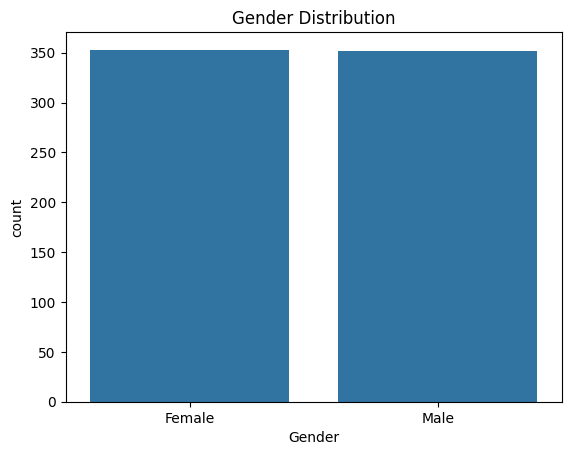

Academic_Level
Undergraduate    353
Graduate         325
High School       27
Name: count, dtype: int64


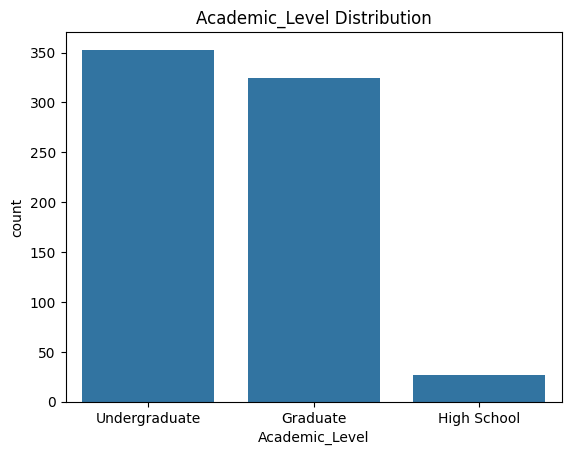

Country
India          53
USA            40
Canada         34
France         27
Mexico         27
               ..
Oman            1
Afghanistan     1
Syria           1
Yemen           1
Bhutan          1
Name: count, Length: 110, dtype: int64


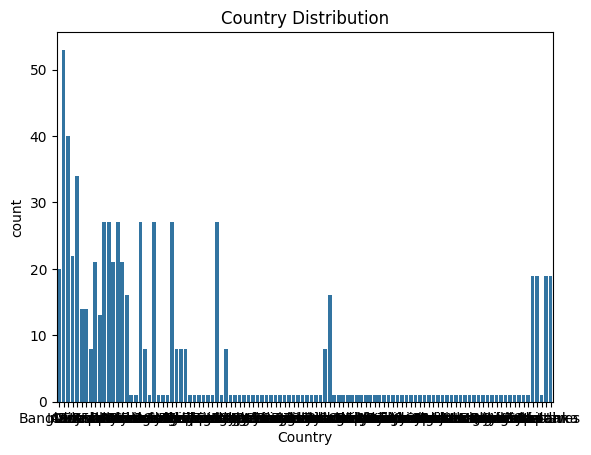

Most_Used_Platform
Instagram    249
TikTok       154
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      21
WeChat        15
Snapchat      13
VKontakte     12
LINE          12
KakaoTalk     12
YouTube       10
Name: count, dtype: int64


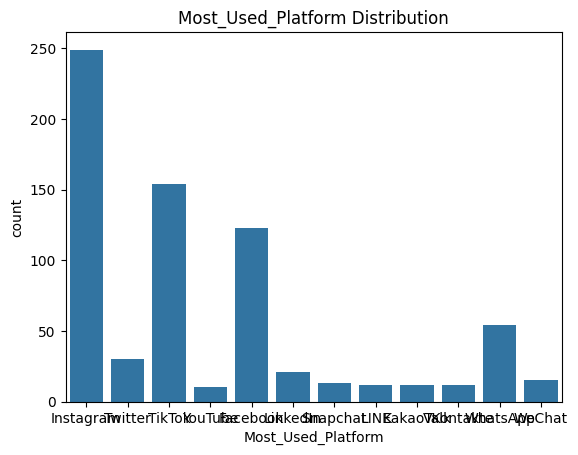

Affects_Academic_Performance
Yes    453
No     252
Name: count, dtype: int64


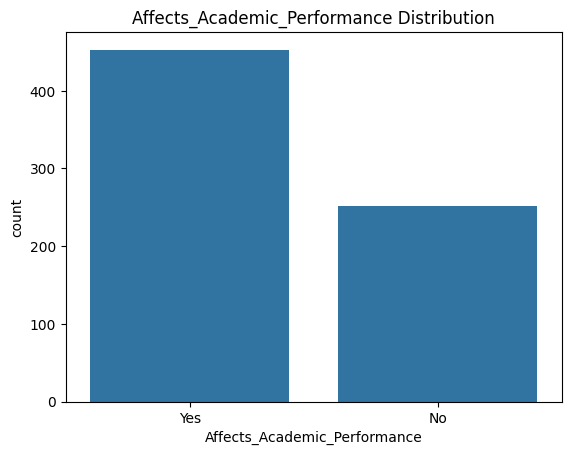

Relationship_Status
Single             384
In Relationship    289
Complicated         32
Name: count, dtype: int64


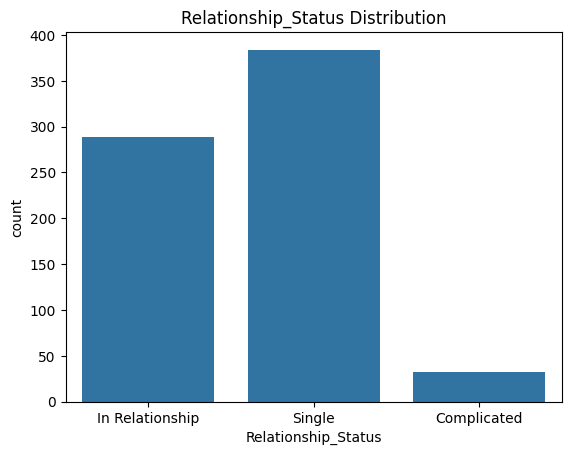

In [68]:
# for catagorical columns

for col in cat_col:
    print(df[col].value_counts())
    sns.countplot(x=col, data=df)
    plt.title(f"{col} Distribution")
    plt.show()



📊 Numerical vs Numerical Bivariate Analysis:

Correlation between 'Age' and 'Avg_Daily_Usage_Hours': -0.11


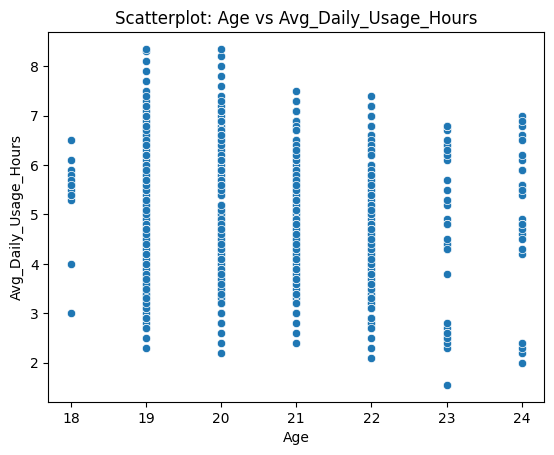


Correlation between 'Age' and 'Sleep_Hours_Per_Night': 0.13


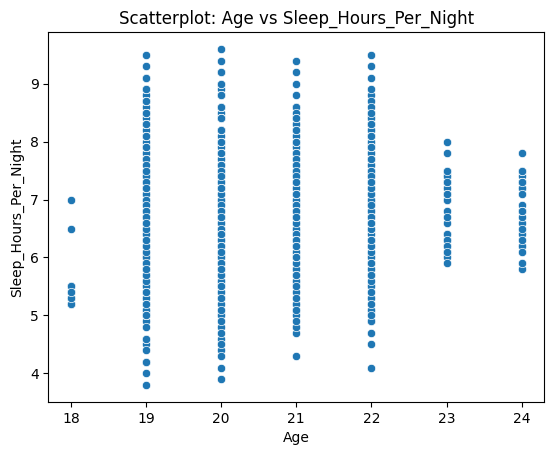


Correlation between 'Age' and 'Mental_Health_Score': 0.16


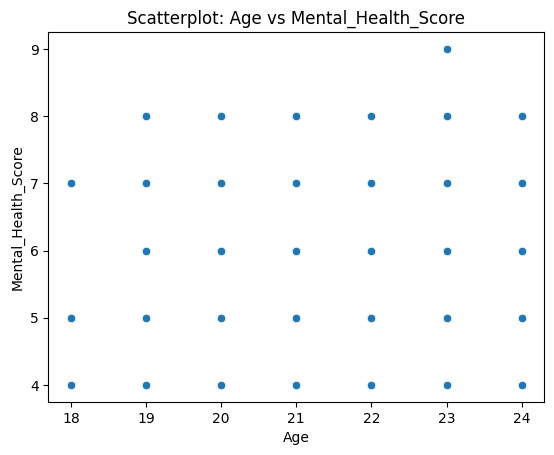


Correlation between 'Age' and 'Conflicts_Over_Social_Media': -0.18


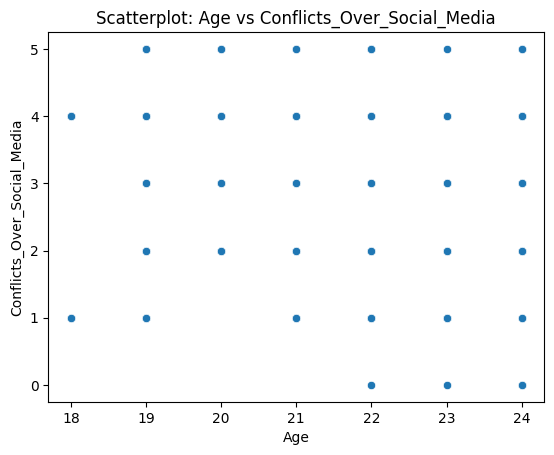


Correlation between 'Age' and 'Addicted_Score': -0.17


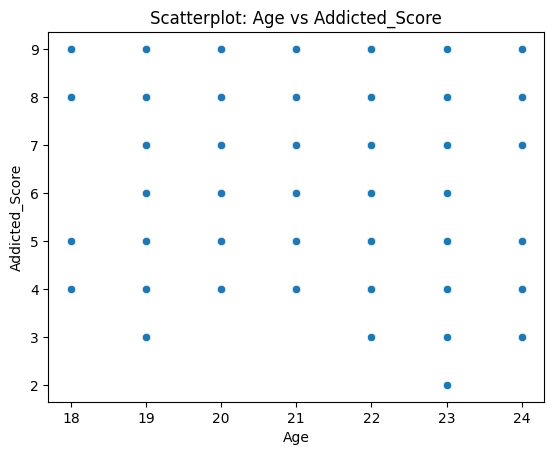


Correlation between 'Avg_Daily_Usage_Hours' and 'Sleep_Hours_Per_Night': -0.79


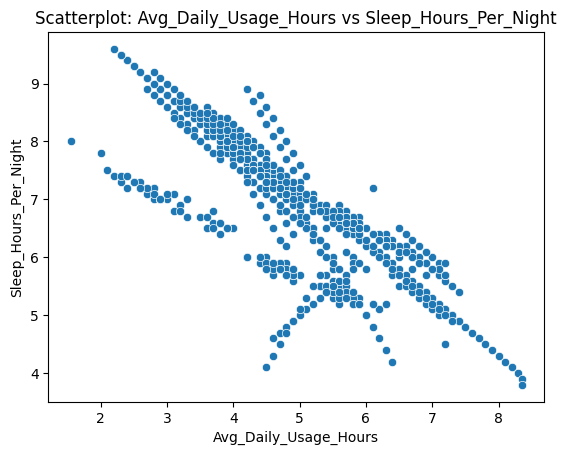


Correlation between 'Avg_Daily_Usage_Hours' and 'Mental_Health_Score': -0.80


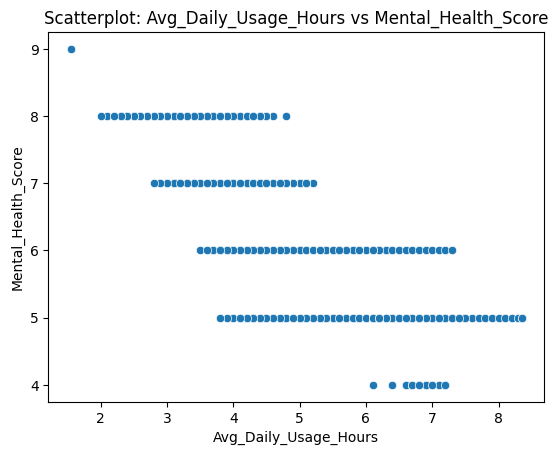


Correlation between 'Avg_Daily_Usage_Hours' and 'Conflicts_Over_Social_Media': 0.80


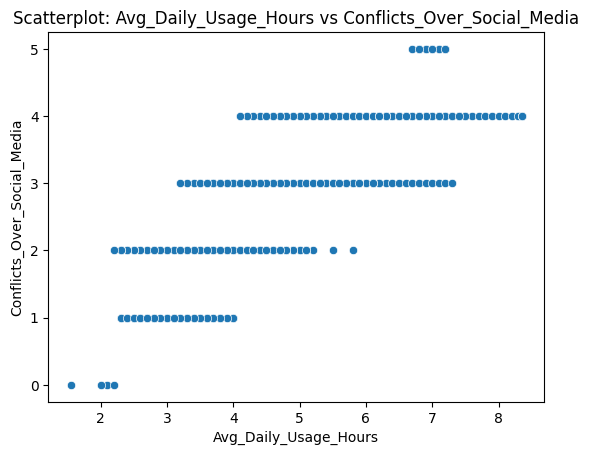


Correlation between 'Avg_Daily_Usage_Hours' and 'Addicted_Score': 0.83


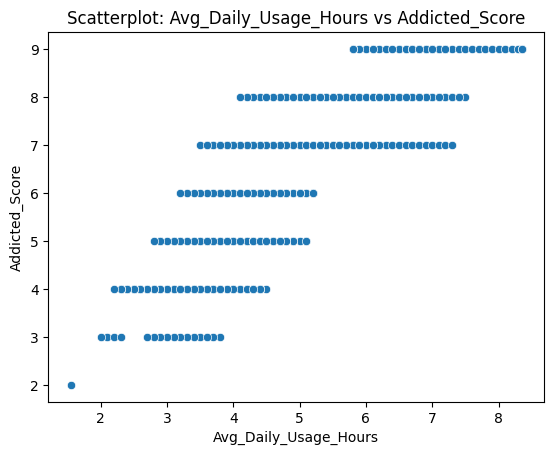


Correlation between 'Sleep_Hours_Per_Night' and 'Mental_Health_Score': 0.71


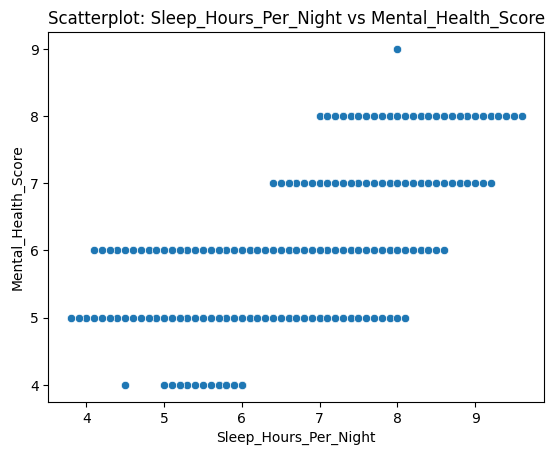


Correlation between 'Sleep_Hours_Per_Night' and 'Conflicts_Over_Social_Media': -0.68


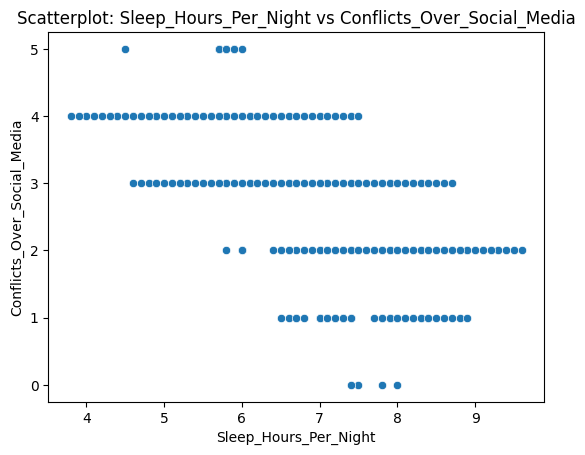


Correlation between 'Sleep_Hours_Per_Night' and 'Addicted_Score': -0.76


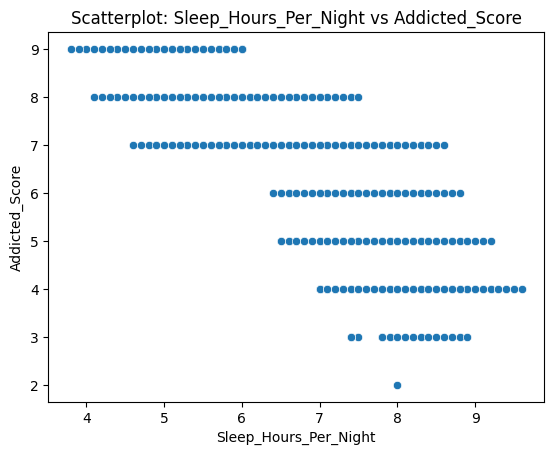


Correlation between 'Mental_Health_Score' and 'Conflicts_Over_Social_Media': -0.89


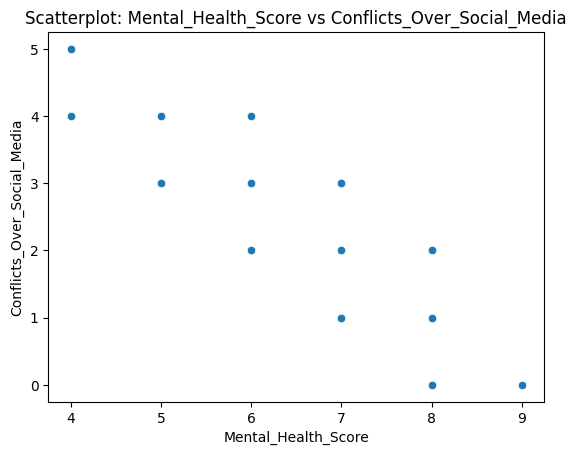


Correlation between 'Mental_Health_Score' and 'Addicted_Score': -0.95


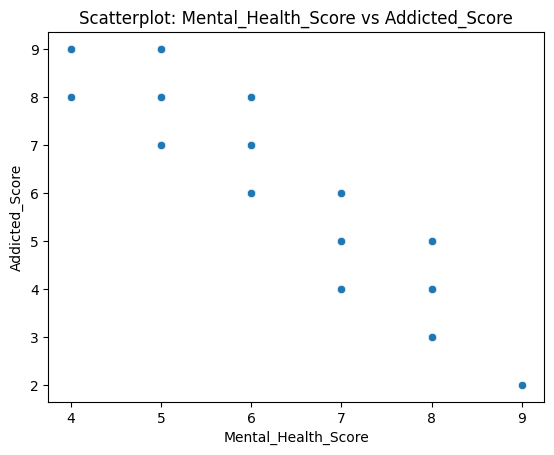


Correlation between 'Conflicts_Over_Social_Media' and 'Addicted_Score': 0.93


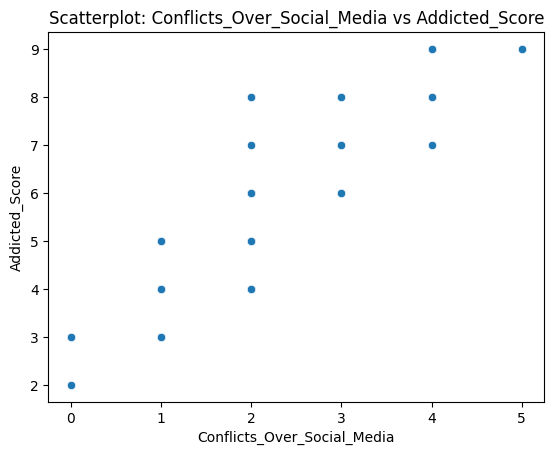


📊 Categorical vs Numerical Bivariate Analysis:

Boxplot of 'Age' by 'Gender':


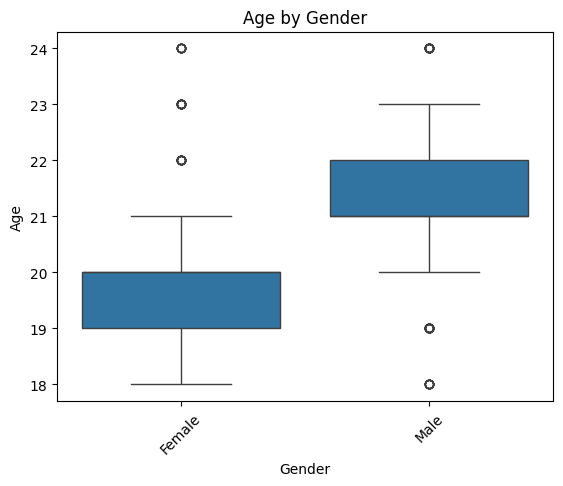


Boxplot of 'Avg_Daily_Usage_Hours' by 'Gender':


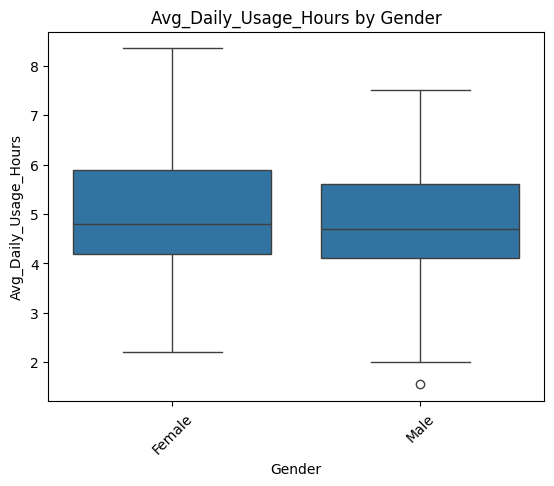


Boxplot of 'Sleep_Hours_Per_Night' by 'Gender':


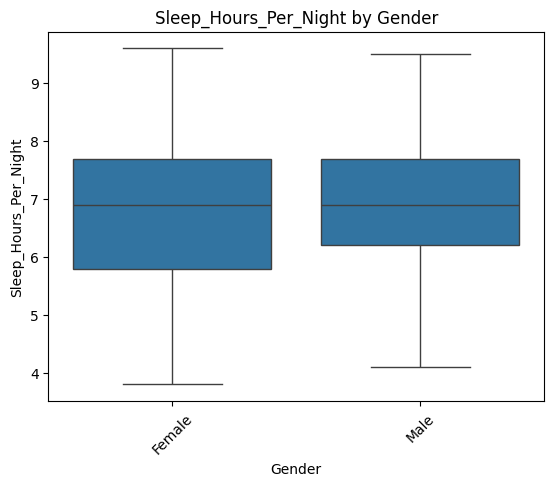


Boxplot of 'Mental_Health_Score' by 'Gender':


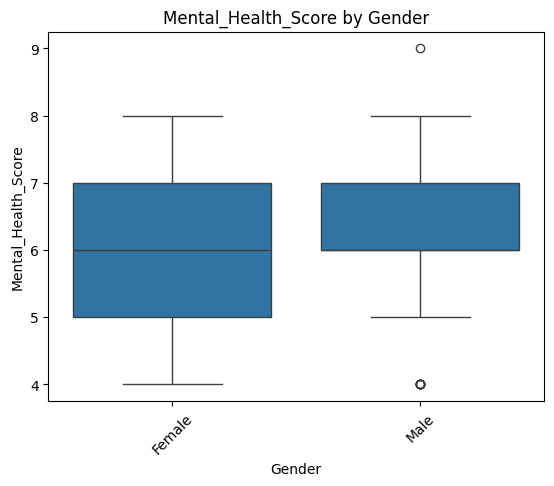


Boxplot of 'Conflicts_Over_Social_Media' by 'Gender':


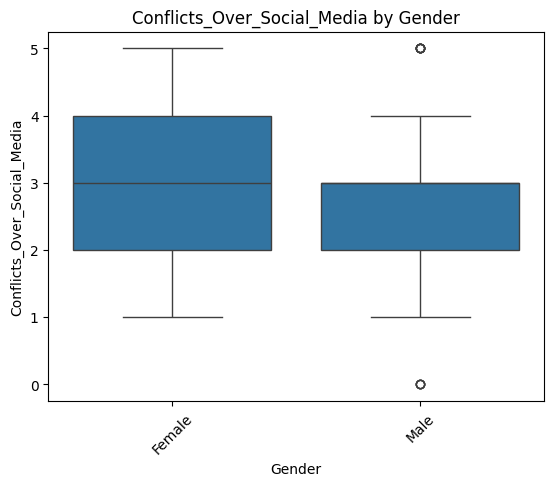


Boxplot of 'Addicted_Score' by 'Gender':


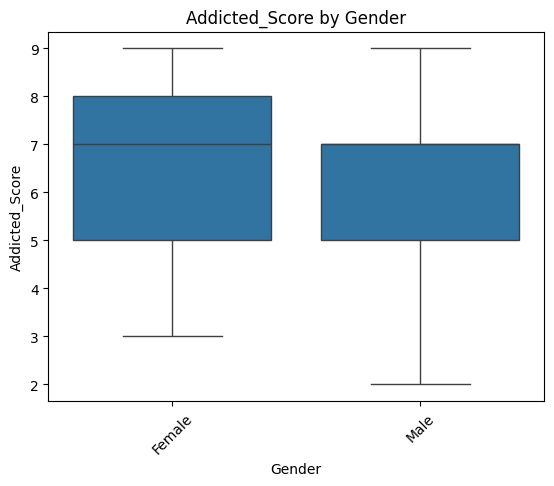


Boxplot of 'Age' by 'Academic_Level':


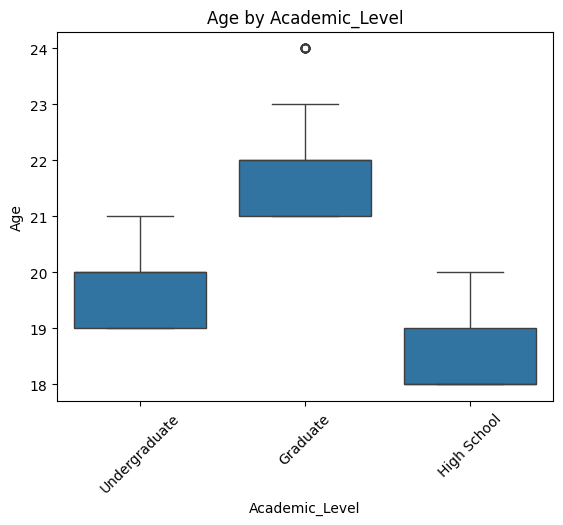


Boxplot of 'Avg_Daily_Usage_Hours' by 'Academic_Level':


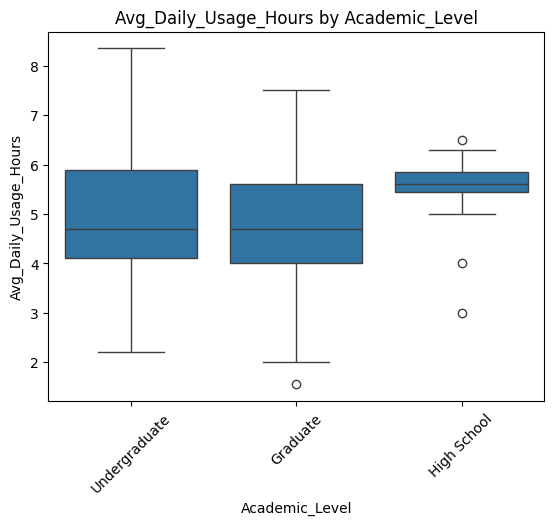


Boxplot of 'Sleep_Hours_Per_Night' by 'Academic_Level':


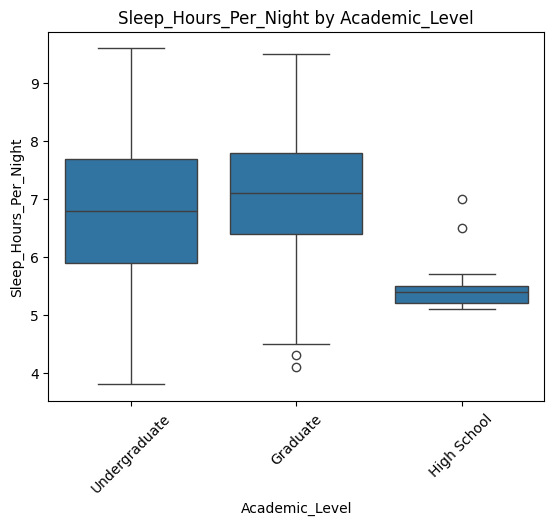


Boxplot of 'Mental_Health_Score' by 'Academic_Level':


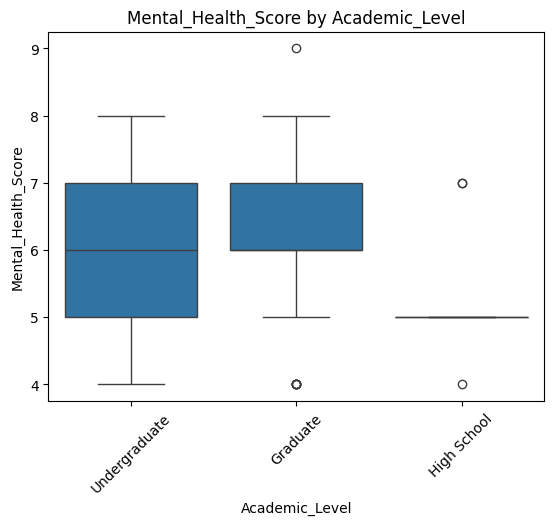


Boxplot of 'Conflicts_Over_Social_Media' by 'Academic_Level':


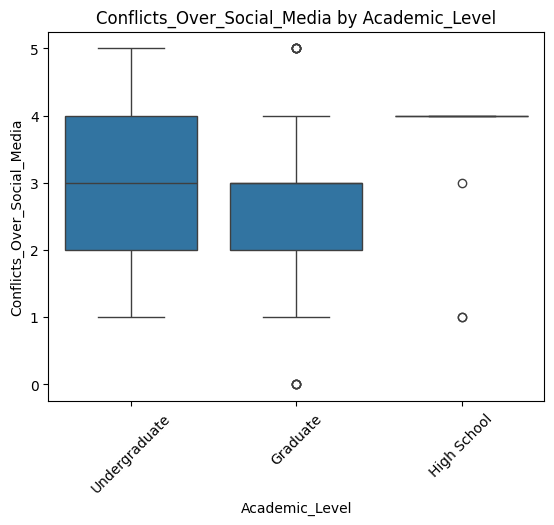


Boxplot of 'Addicted_Score' by 'Academic_Level':


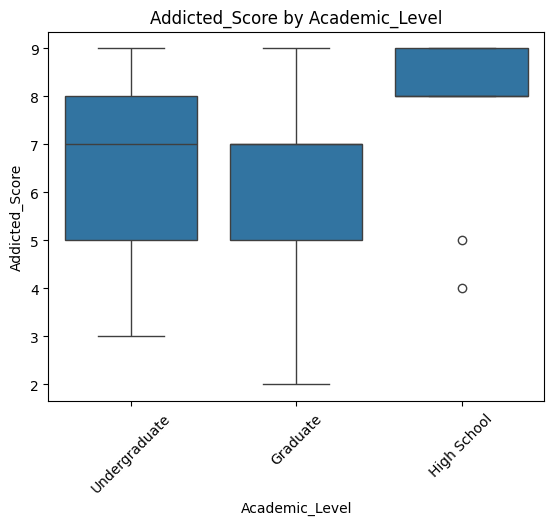


Boxplot of 'Age' by 'Country':


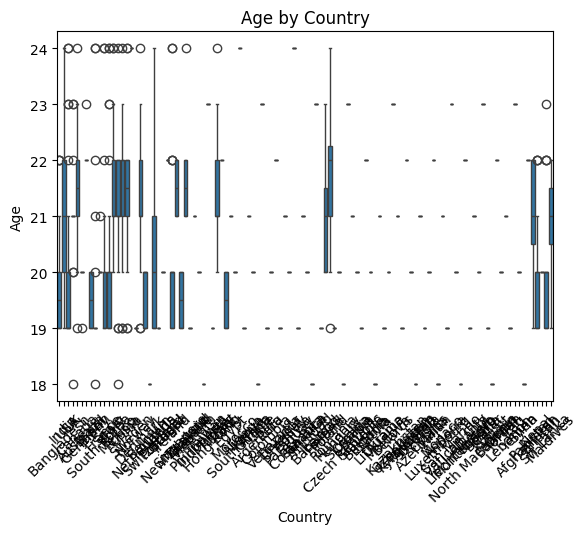


Boxplot of 'Avg_Daily_Usage_Hours' by 'Country':


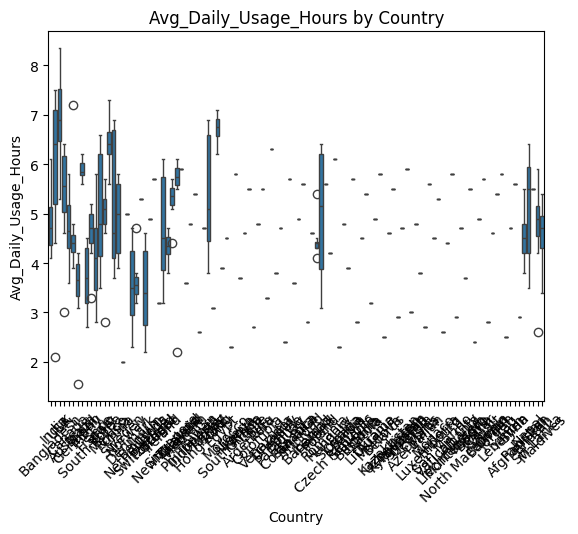


Boxplot of 'Sleep_Hours_Per_Night' by 'Country':


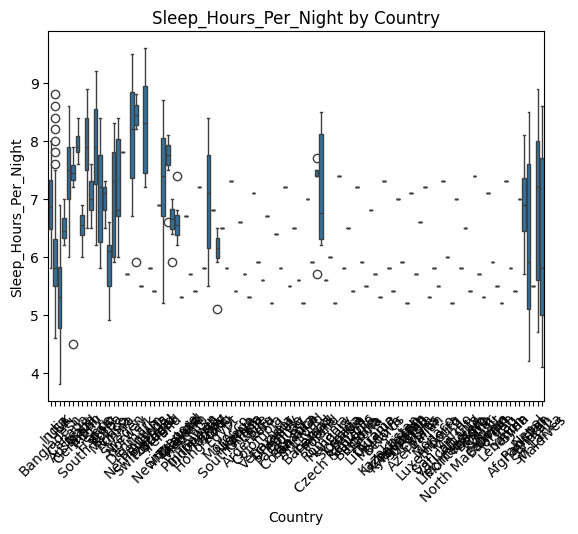


Boxplot of 'Mental_Health_Score' by 'Country':


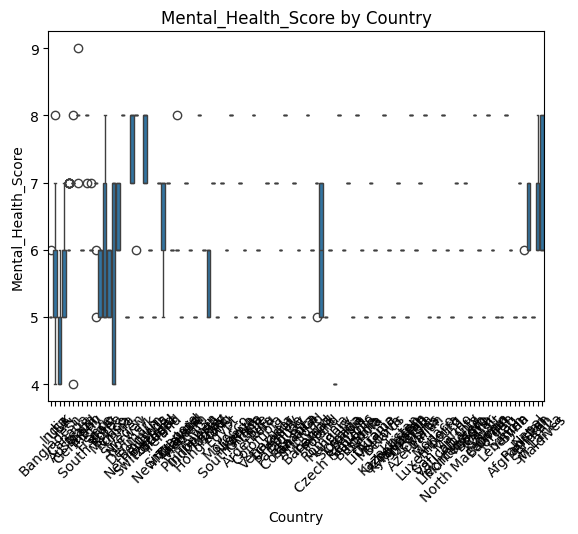


Boxplot of 'Conflicts_Over_Social_Media' by 'Country':


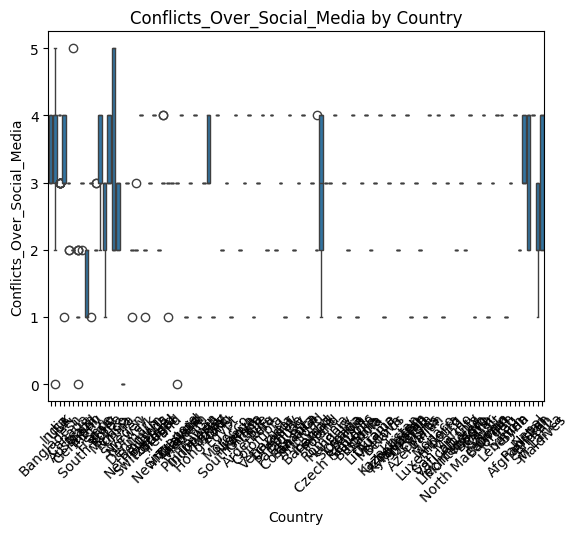


Boxplot of 'Addicted_Score' by 'Country':


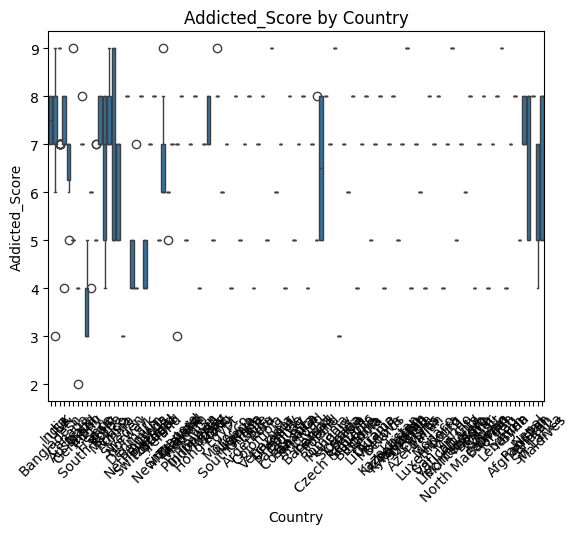


Boxplot of 'Age' by 'Most_Used_Platform':


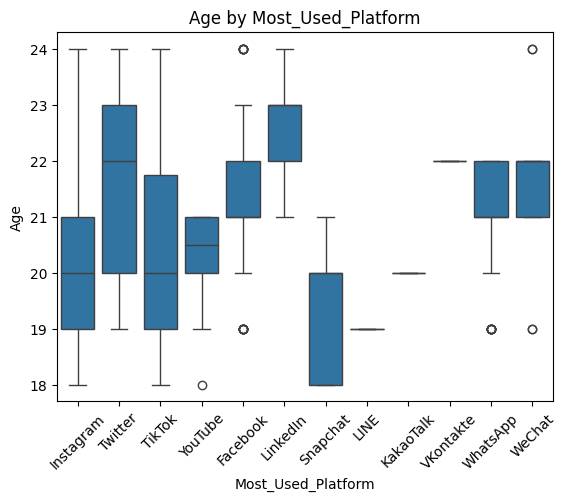


Boxplot of 'Avg_Daily_Usage_Hours' by 'Most_Used_Platform':


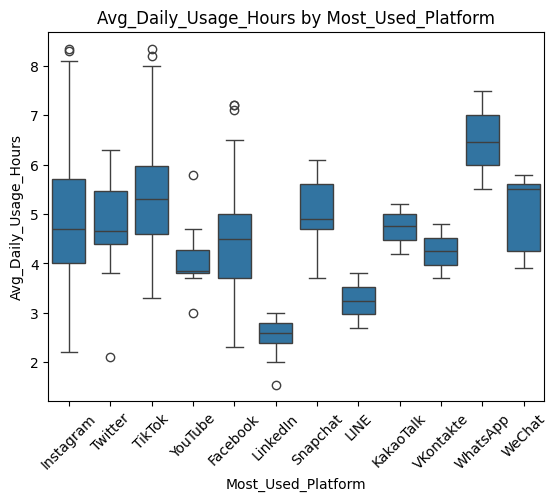


Boxplot of 'Sleep_Hours_Per_Night' by 'Most_Used_Platform':


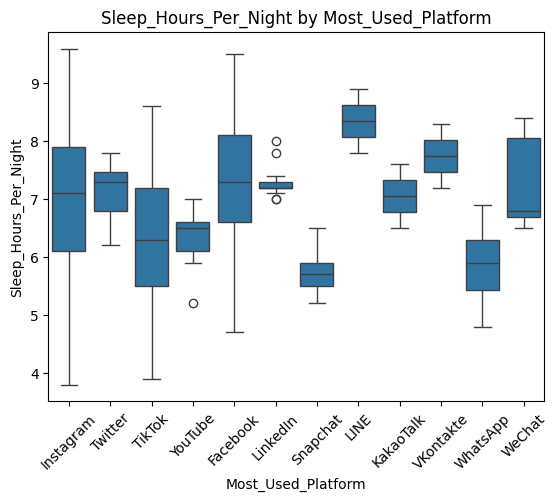


Boxplot of 'Mental_Health_Score' by 'Most_Used_Platform':


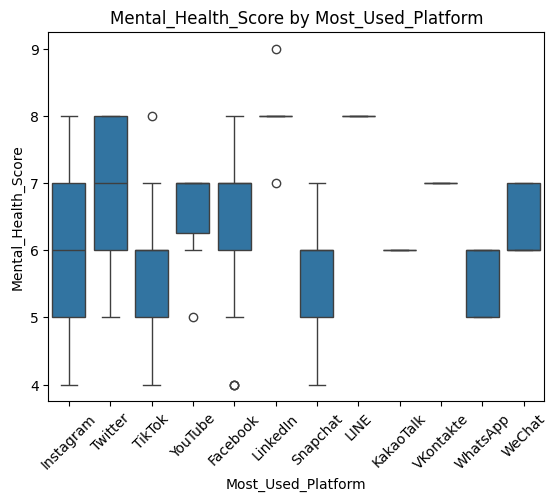


Boxplot of 'Conflicts_Over_Social_Media' by 'Most_Used_Platform':


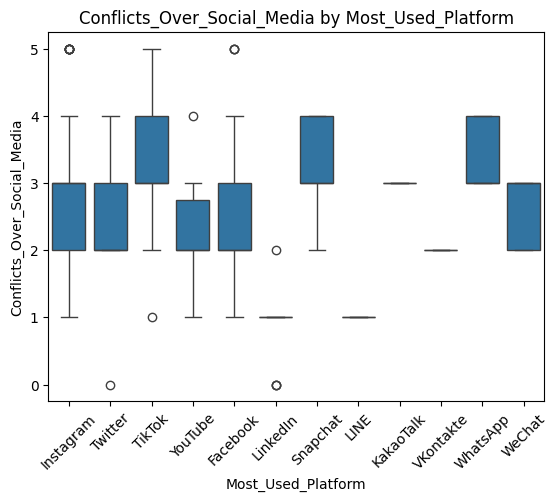


Boxplot of 'Addicted_Score' by 'Most_Used_Platform':


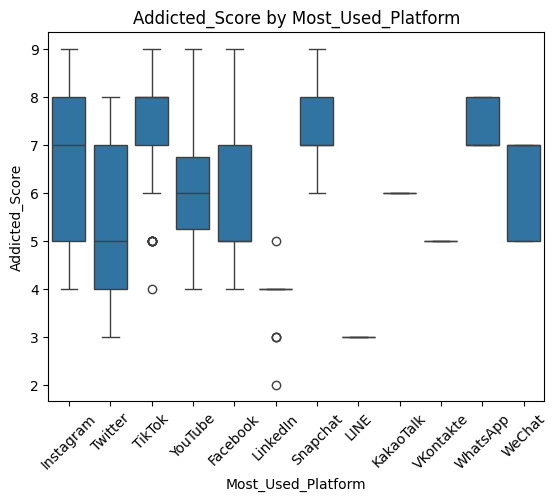


Boxplot of 'Age' by 'Affects_Academic_Performance':


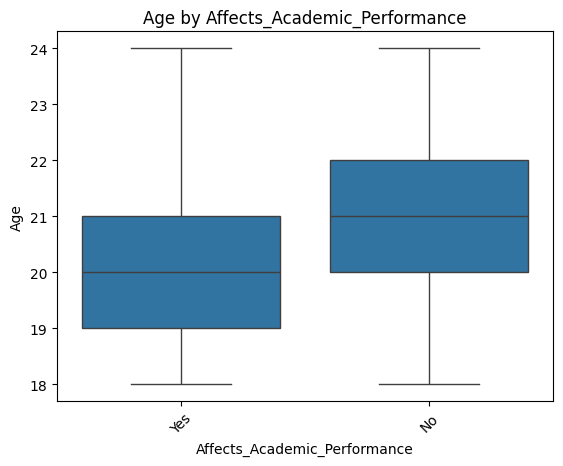


Boxplot of 'Avg_Daily_Usage_Hours' by 'Affects_Academic_Performance':


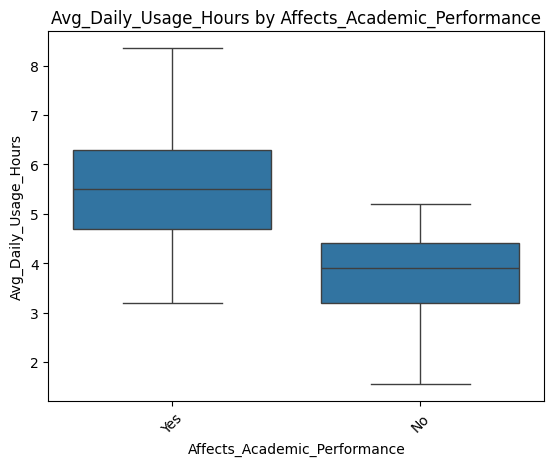


Boxplot of 'Sleep_Hours_Per_Night' by 'Affects_Academic_Performance':


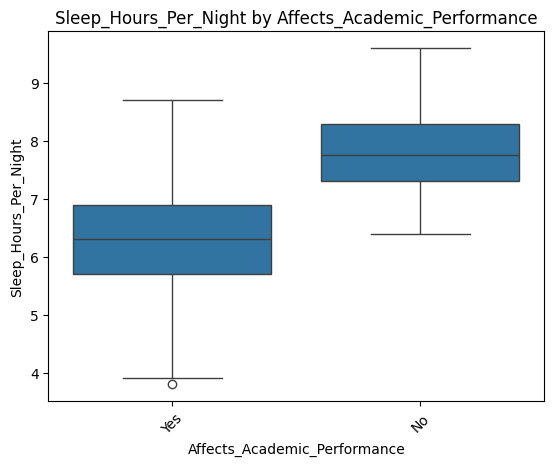


Boxplot of 'Mental_Health_Score' by 'Affects_Academic_Performance':


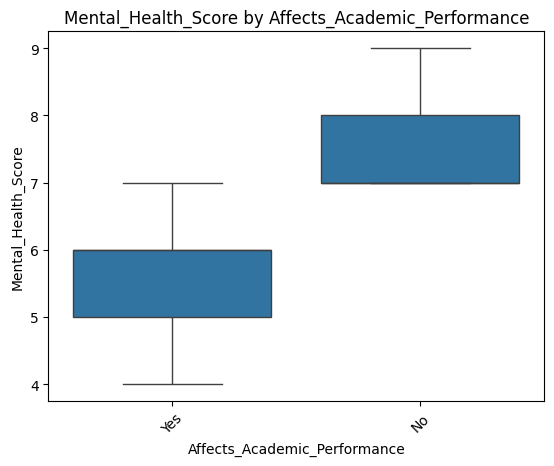


Boxplot of 'Conflicts_Over_Social_Media' by 'Affects_Academic_Performance':


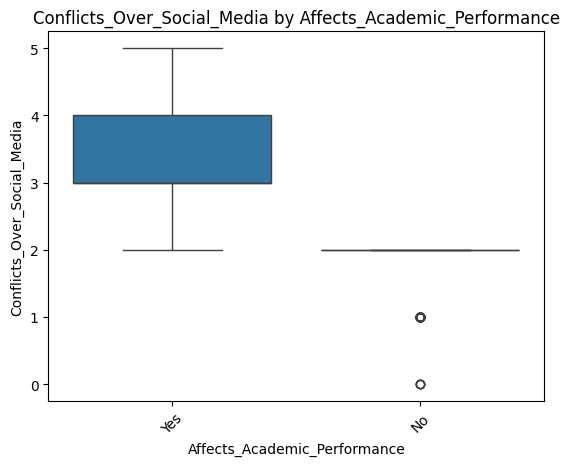


Boxplot of 'Addicted_Score' by 'Affects_Academic_Performance':


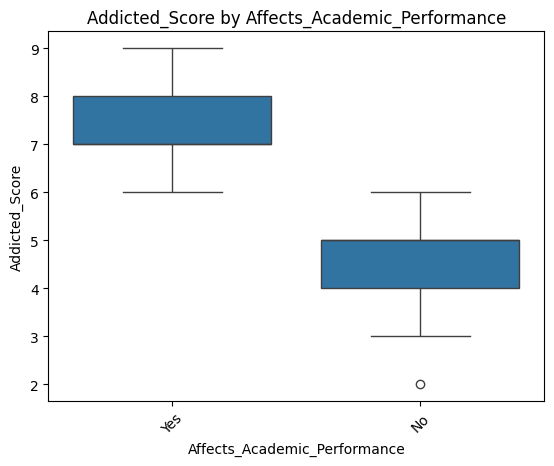


Boxplot of 'Age' by 'Relationship_Status':


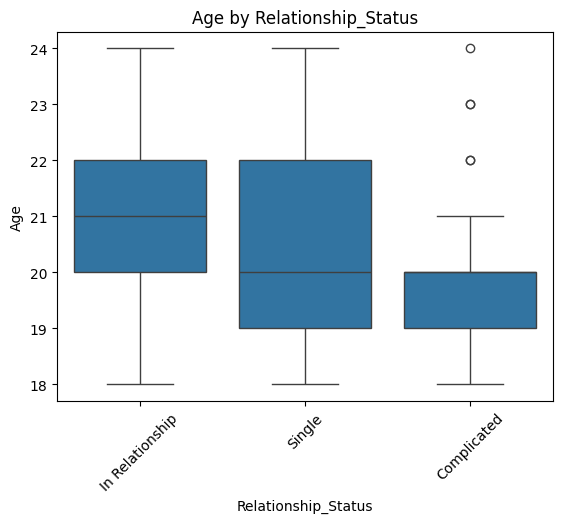


Boxplot of 'Avg_Daily_Usage_Hours' by 'Relationship_Status':


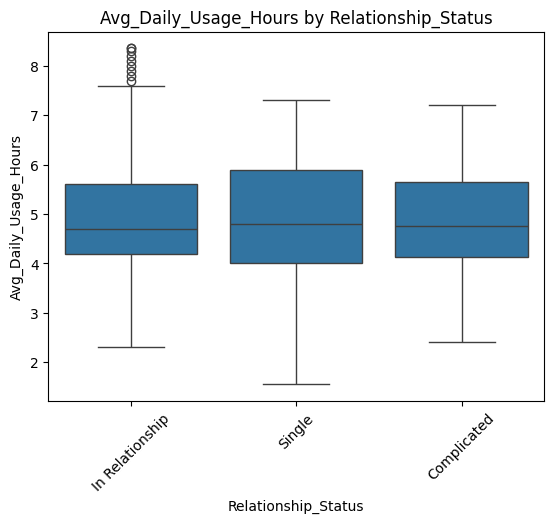


Boxplot of 'Sleep_Hours_Per_Night' by 'Relationship_Status':


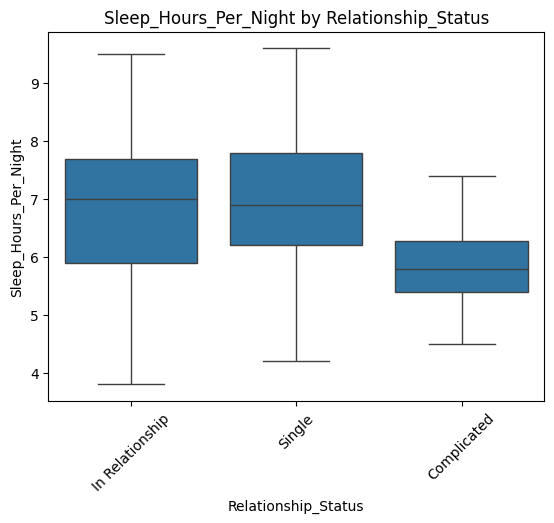


Boxplot of 'Mental_Health_Score' by 'Relationship_Status':


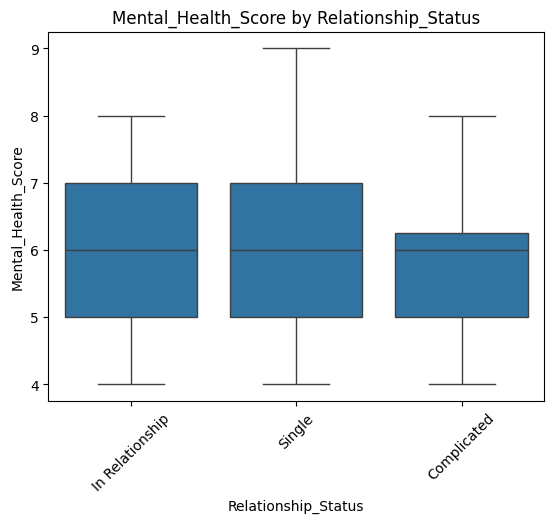


Boxplot of 'Conflicts_Over_Social_Media' by 'Relationship_Status':


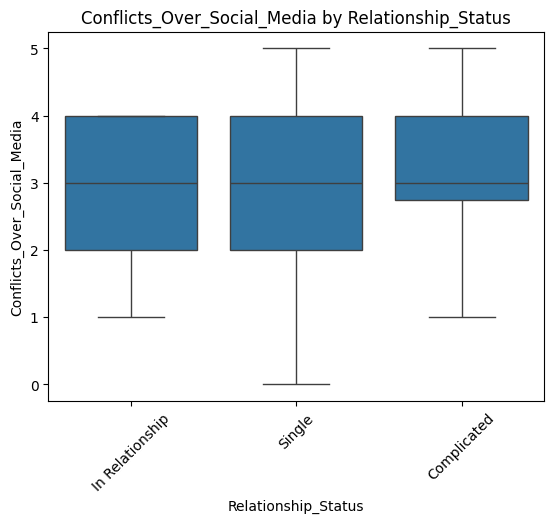


Boxplot of 'Addicted_Score' by 'Relationship_Status':


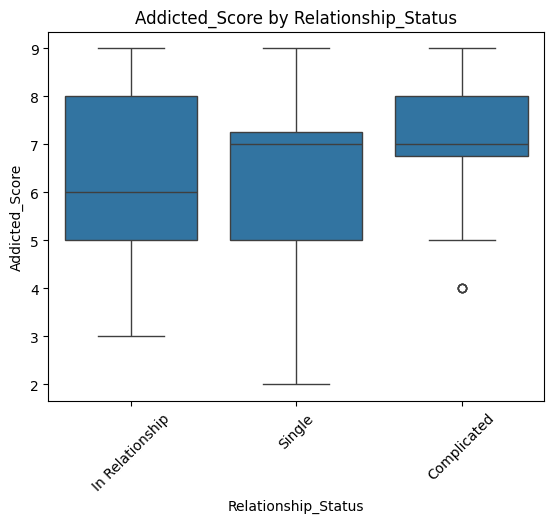


📊 Categorical vs Categorical Bivariate Analysis:

Cross-tab between 'Gender' and 'Academic_Level':
Academic_Level  Graduate  High School  Undergraduate
Gender                                              
Female                48           15            290
Male                 277           12             63


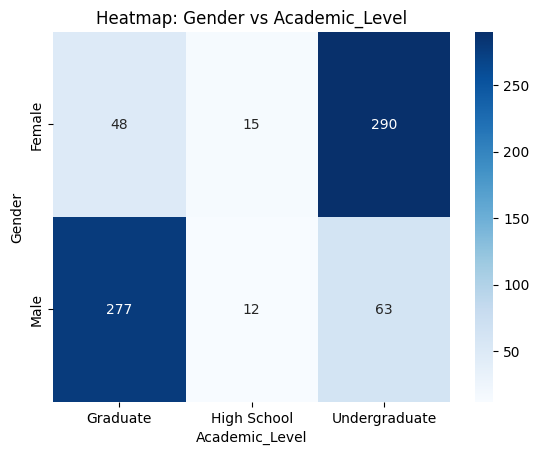


Cross-tab between 'Gender' and 'Country':
Country  Afghanistan  Albania  Andorra  Argentina  Armenia  Australia  \
Gender                                                                  
Female             0        1        0          0        1         14   
Male               1        0        1          1        0          0   

Country  Austria  Azerbaijan  Bahamas  Bahrain  ...  UAE  UK  USA  Ukraine  \
Gender                                          ...                          
Female         0           1        1        1  ...    8   4   36        0   
Male           1           0        0        0  ...    0  18    4        1   

Country  Uruguay  Uzbekistan  Vatican City  Venezuela  Vietnam  Yemen  
Gender                                                                 
Female         0           0             0          0        0      0  
Male           1           1             1          1        1      1  

[2 rows x 110 columns]


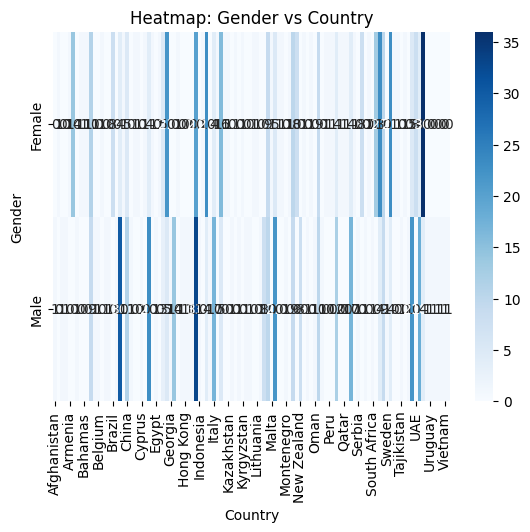


Cross-tab between 'Gender' and 'Most_Used_Platform':
Most_Used_Platform  Facebook  Instagram  KakaoTalk  LINE  LinkedIn  Snapchat  \
Gender                                                                         
Female                    24        172         12    12         8         8   
Male                      99         77          0     0        13         5   

Most_Used_Platform  TikTok  Twitter  VKontakte  WeChat  WhatsApp  YouTube  
Gender                                                                     
Female                  86       16          0       4        11        0  
Male                    68       14         12      11        43       10  


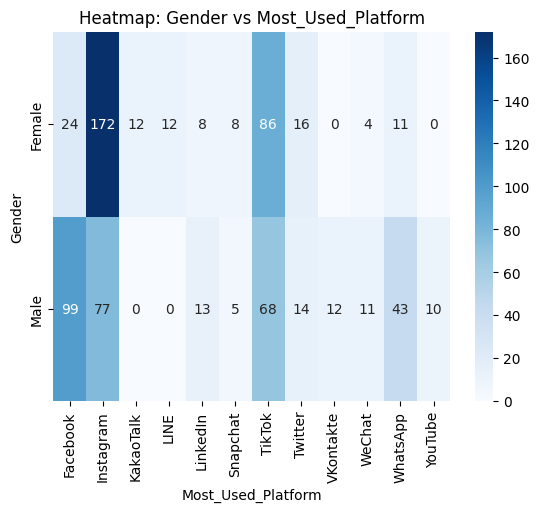


Cross-tab between 'Gender' and 'Affects_Academic_Performance':
Affects_Academic_Performance   No  Yes
Gender                                
Female                        122  231
Male                          130  222


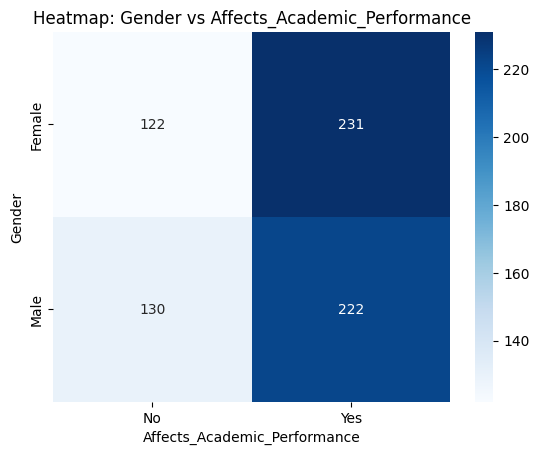


Cross-tab between 'Gender' and 'Relationship_Status':
Relationship_Status  Complicated  In Relationship  Single
Gender                                                   
Female                        17              138     198
Male                          15              151     186


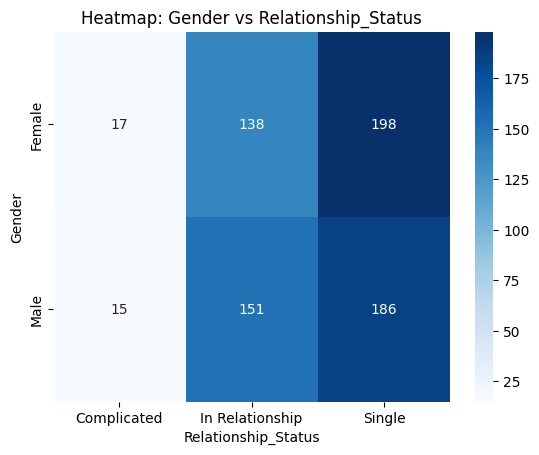


Cross-tab between 'Academic_Level' and 'Country':
Country         Afghanistan  Albania  Andorra  Argentina  Armenia  Australia  \
Academic_Level                                                                 
Graduate                  1        0        0          0        0          0   
High School               0        0        1          1        1          0   
Undergraduate             0        1        0          0        0         14   

Country         Austria  Azerbaijan  Bahamas  Bahrain  ...  UAE  UK  USA  \
Academic_Level                                         ...                 
Graduate              0           0        1        1  ...    0  16    5   
High School           0           0        0        0  ...    1   1    0   
Undergraduate         1           1        0        0  ...    7   5   35   

Country         Ukraine  Uruguay  Uzbekistan  Vatican City  Venezuela  \
Academic_Level                                                          
Graduate             

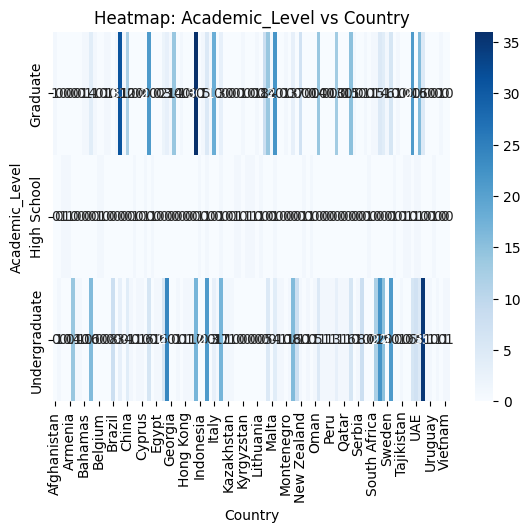


Cross-tab between 'Academic_Level' and 'Most_Used_Platform':
Most_Used_Platform  Facebook  Instagram  KakaoTalk  LINE  LinkedIn  Snapchat  \
Academic_Level                                                                 
Graduate                  87         82          0     0        21         0   
High School                0         12          0     0         0         5   
Undergraduate             36        155         12    12         0         8   

Most_Used_Platform  TikTok  Twitter  VKontakte  WeChat  WhatsApp  YouTube  
Academic_Level                                                             
Graduate                51       17         12      12        43        0  
High School              8        0          0       0         0        2  
Undergraduate           95       13          0       3        11        8  


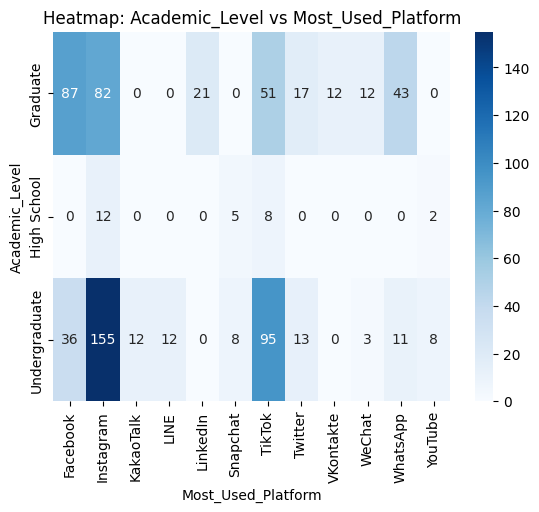


Cross-tab between 'Academic_Level' and 'Affects_Academic_Performance':
Affects_Academic_Performance   No  Yes
Academic_Level                        
Graduate                      126  199
High School                     2   25
Undergraduate                 124  229


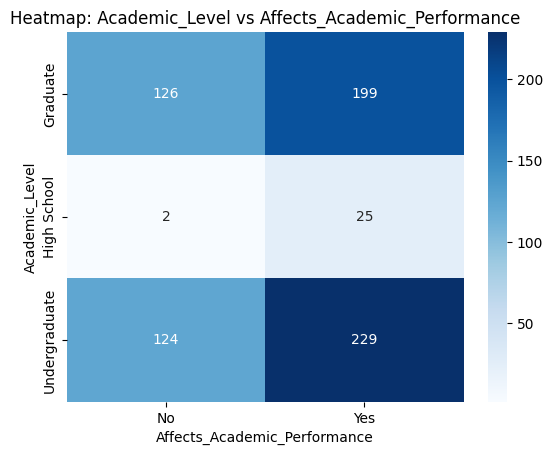


Cross-tab between 'Academic_Level' and 'Relationship_Status':
Relationship_Status  Complicated  In Relationship  Single
Academic_Level                                           
Graduate                       5              163     157
High School                    9                6      12
Undergraduate                 18              120     215


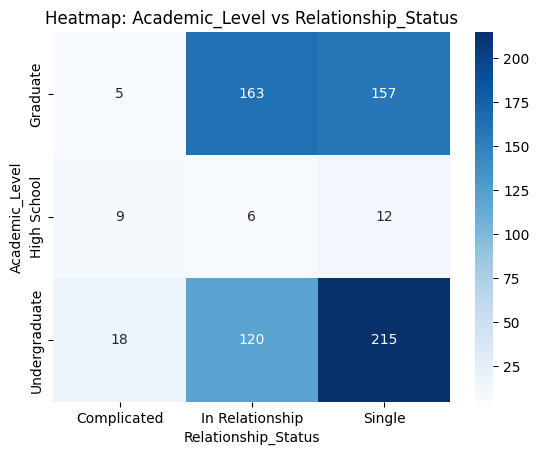


Cross-tab between 'Country' and 'Most_Used_Platform':
Most_Used_Platform  Facebook  Instagram  KakaoTalk  LINE  LinkedIn  Snapchat  \
Country                                                                        
Afghanistan                0          0          0     0         1         0   
Albania                    0          0          0     0         0         0   
Andorra                    0          0          0     0         0         0   
Argentina                  0          0          0     0         0         0   
Armenia                    0          1          0     0         0         0   
...                      ...        ...        ...   ...       ...       ...   
Uzbekistan                 0          0          0     0         0         0   
Vatican City               0          0          0     0         0         0   
Venezuela                  1          0          0     0         0         0   
Vietnam                    1          0          0     0         

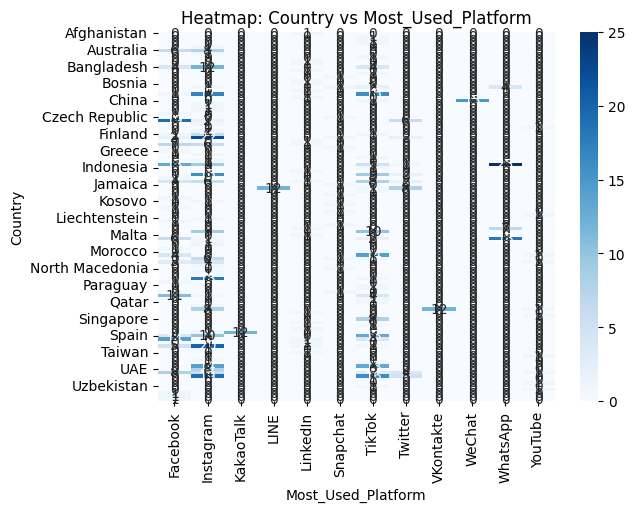


Cross-tab between 'Country' and 'Affects_Academic_Performance':
Affects_Academic_Performance  No  Yes
Country                              
Afghanistan                    1    0
Albania                        0    1
Andorra                        0    1
Argentina                      0    1
Armenia                        0    1
...                           ..  ...
Uzbekistan                     0    1
Vatican City                   0    1
Venezuela                      1    0
Vietnam                        1    0
Yemen                          0    1

[110 rows x 2 columns]


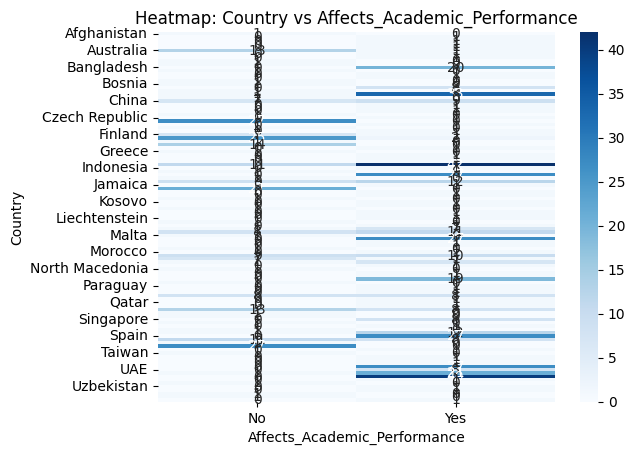


Cross-tab between 'Country' and 'Relationship_Status':
Relationship_Status  Complicated  In Relationship  Single
Country                                                  
Afghanistan                    1                0       0
Albania                        1                0       0
Andorra                        0                1       0
Argentina                      0                0       1
Armenia                        1                0       0
...                          ...              ...     ...
Uzbekistan                     1                0       0
Vatican City                   1                0       0
Venezuela                      0                1       0
Vietnam                        0                0       1
Yemen                          0                1       0

[110 rows x 3 columns]


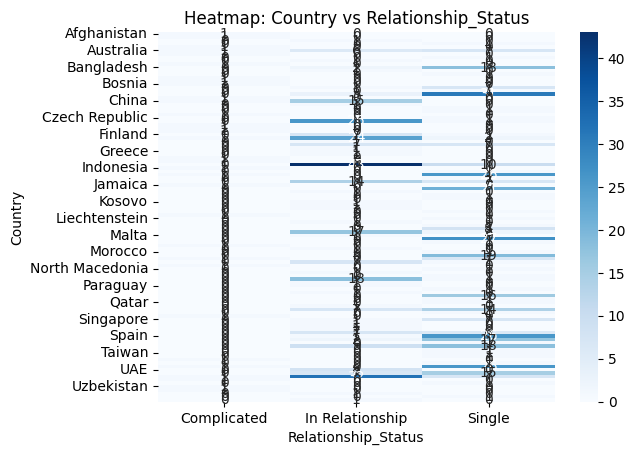


Cross-tab between 'Most_Used_Platform' and 'Affects_Academic_Performance':
Affects_Academic_Performance  No  Yes
Most_Used_Platform                   
Facebook                      86   37
Instagram                     77  172
KakaoTalk                      0   12
LINE                          12    0
LinkedIn                      21    0
Snapchat                       1   12
TikTok                        10  144
Twitter                       19   11
VKontakte                     12    0
WeChat                         7    8
WhatsApp                       0   54
YouTube                        7    3


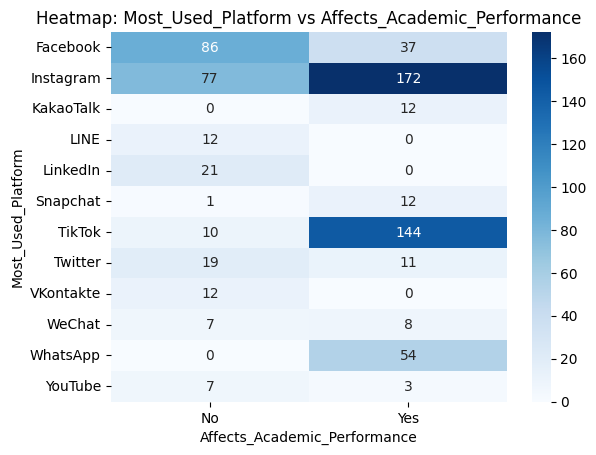


Cross-tab between 'Most_Used_Platform' and 'Relationship_Status':
Relationship_Status  Complicated  In Relationship  Single
Most_Used_Platform                                       
Facebook                       1               71      51
Instagram                     10               94     145
KakaoTalk                      0                6       6
LINE                           0                0      12
LinkedIn                       5                8       8
Snapchat                       4                4       5
TikTok                         8               45     101
Twitter                        0               14      16
VKontakte                      0                6       6
WeChat                         0               15       0
WhatsApp                       0               25      29
YouTube                        4                1       5


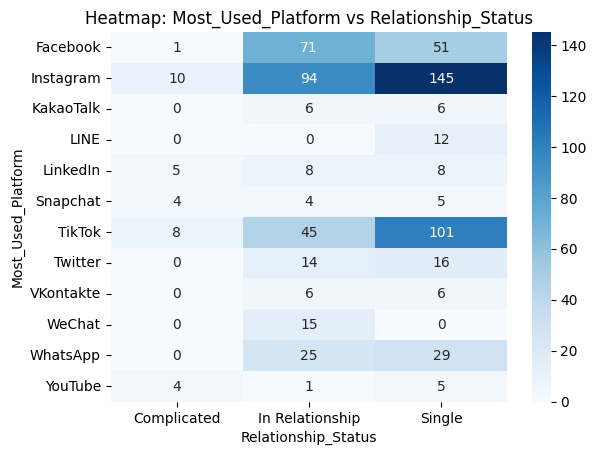


Cross-tab between 'Affects_Academic_Performance' and 'Relationship_Status':
Relationship_Status           Complicated  In Relationship  Single
Affects_Academic_Performance                                      
No                                      8              133     111
Yes                                    24              156     273


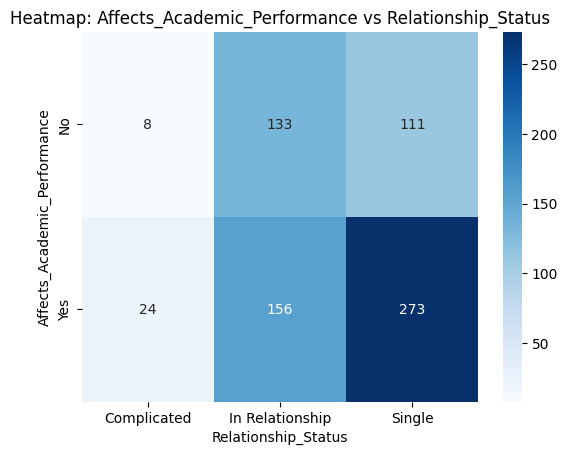

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Separate column types
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns

# Bivariate: Numerical vs Numerical
print("\n📊 Numerical vs Numerical Bivariate Analysis:")
for i in range(len(num_cols)):
    for j in range(i+1, len(num_cols)):
        col1 = num_cols[i]
        col2 = num_cols[j]
        corr = df[[col1, col2]].corr().iloc[0, 1]
        print(f"\nCorrelation between '{col1}' and '{col2}': {corr:.2f}")
        sns.scatterplot(x=col1, y=col2, data=df)
        plt.title(f"Scatterplot: {col1} vs {col2}")
        plt.show()

# Bivariate: Categorical vs Numerical
print("\n📊 Categorical vs Numerical Bivariate Analysis:")
for cat in cat_cols:
    for num in num_cols:
        print(f"\nBoxplot of '{num}' by '{cat}':")
        sns.boxplot(x=cat, y=num, data=df)
        plt.title(f"{num} by {cat}")
        plt.xticks(rotation=45)
        plt.show()

# Bivariate: Categorical vs Categorical
print("\n📊 Categorical vs Categorical Bivariate Analysis:")
for i in range(len(cat_cols)):
    for j in range(i+1, len(cat_cols)):
        col1 = cat_cols[i]
        col2 = cat_cols[j]
        print(f"\nCross-tab between '{col1}' and '{col2}':")
        ctab = pd.crosstab(df[col1], df[col2])
        print(ctab)
        sns.heatmap(ctab, annot=True, fmt='d', cmap='Blues')
        plt.title(f"Heatmap: {col1} vs {col2}")
        plt.show()



📊 Bivariate Analysis with Target: Mental_Health_Score

📈 Correlation between 'Age' and 'Mental_Health_Score': 0.16


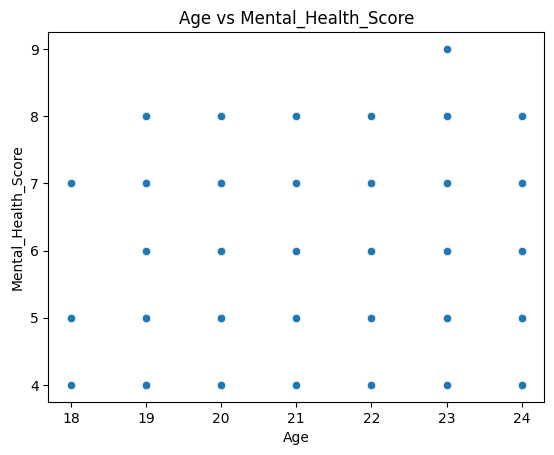


📈 Correlation between 'Avg_Daily_Usage_Hours' and 'Mental_Health_Score': -0.80


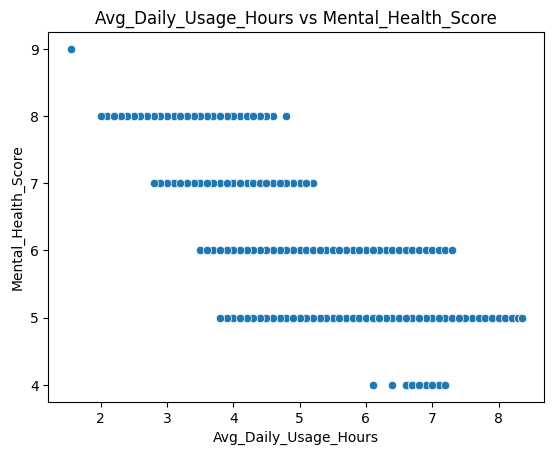


📈 Correlation between 'Sleep_Hours_Per_Night' and 'Mental_Health_Score': 0.71


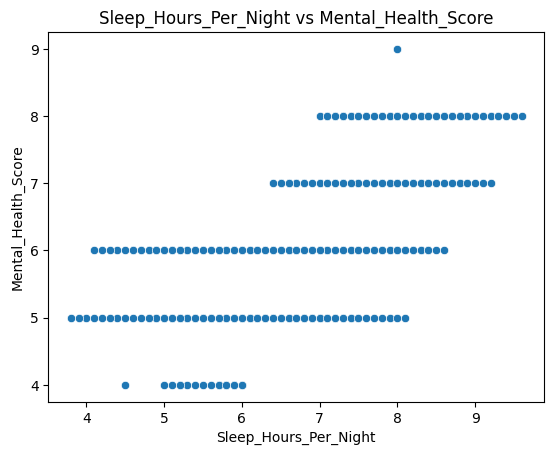


📈 Correlation between 'Conflicts_Over_Social_Media' and 'Mental_Health_Score': -0.89


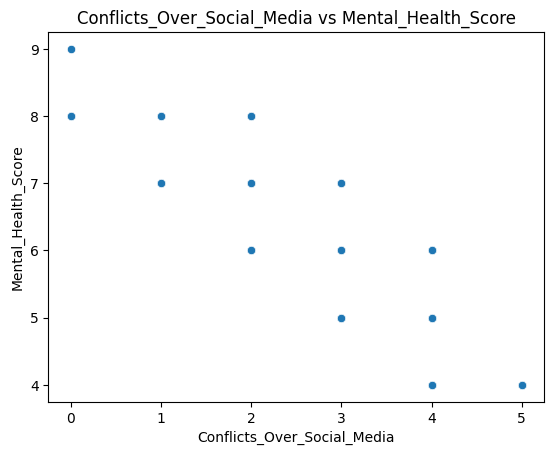


📈 Correlation between 'Addicted_Score' and 'Mental_Health_Score': -0.95


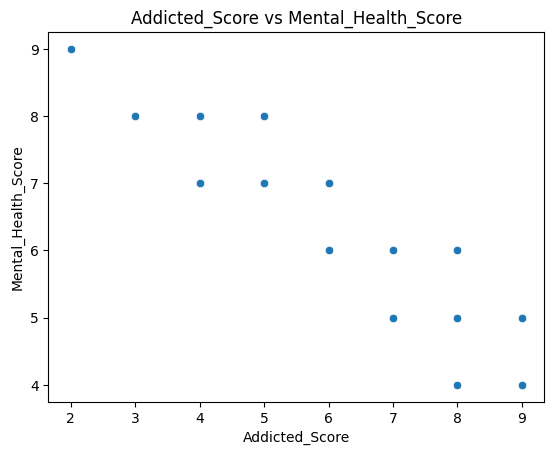


📊 Boxplot: Mental_Health_Score by Gender


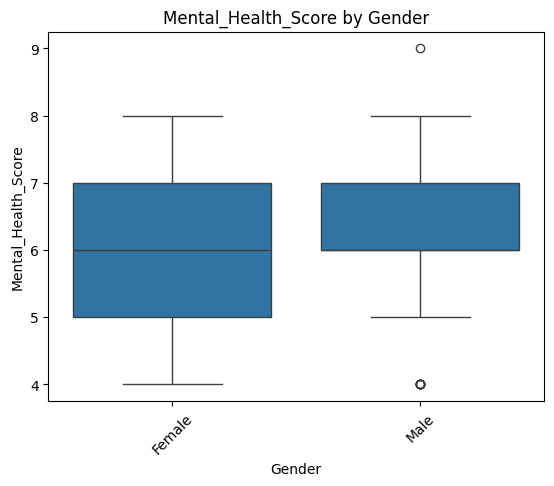


📊 Boxplot: Mental_Health_Score by Academic_Level


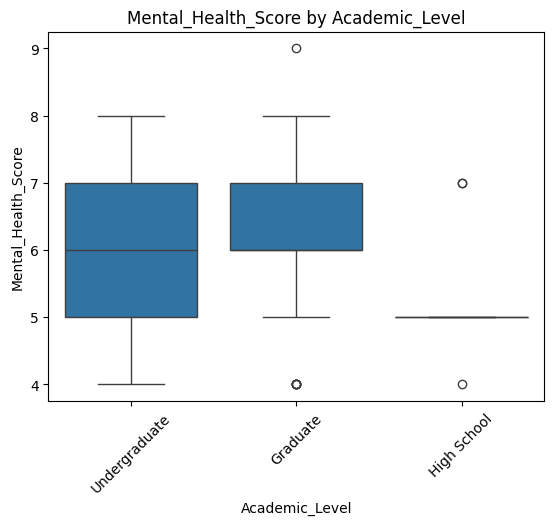


📊 Boxplot: Mental_Health_Score by Country


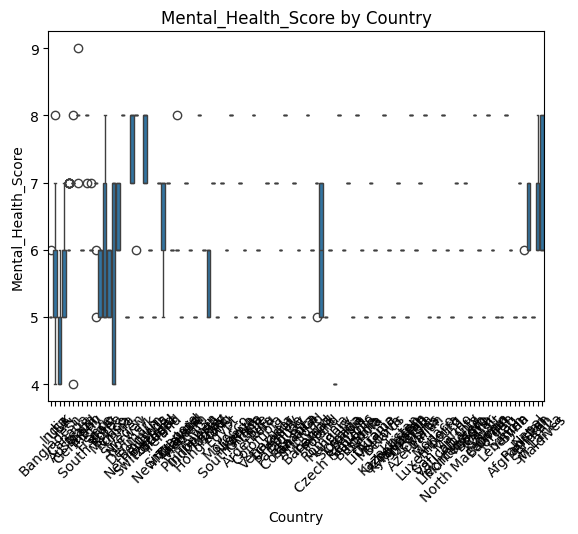


📊 Boxplot: Mental_Health_Score by Most_Used_Platform


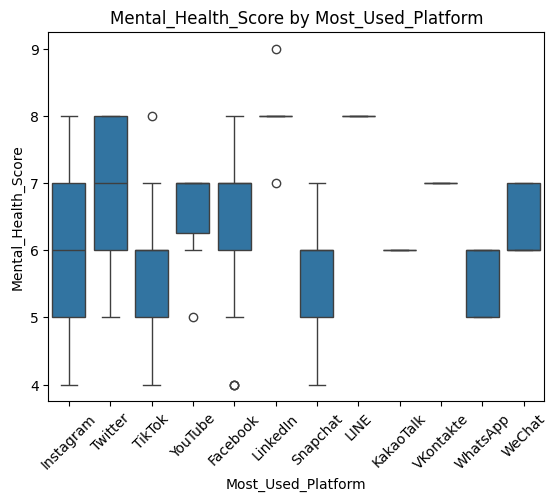


📊 Boxplot: Mental_Health_Score by Affects_Academic_Performance


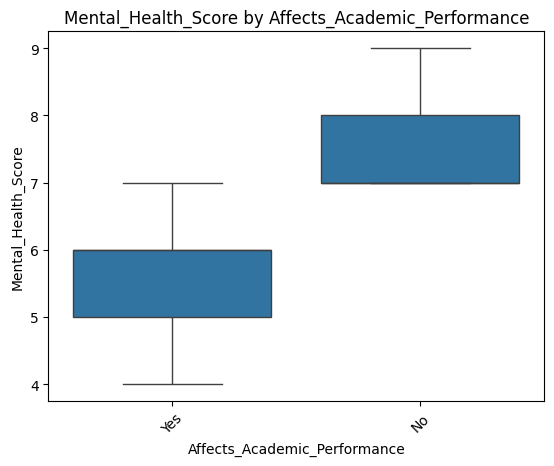


📊 Boxplot: Mental_Health_Score by Relationship_Status


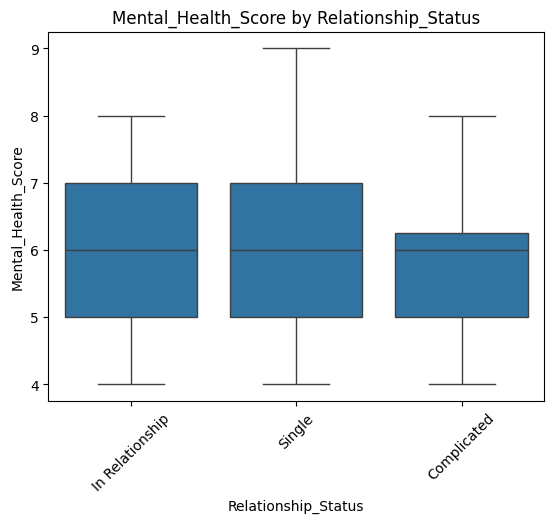

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

target = 'Mental_Health_Score'

num_cols = df.select_dtypes(include='number').columns.drop(target)
cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns

print(f"\n📊 Bivariate Analysis with Target: {target}")

# Numerical vs Target
for col in num_cols:
    corr = df[[col, target]].corr().iloc[0, 1]
    print(f"\n📈 Correlation between '{col}' and '{target}': {corr:.2f}")
    sns.scatterplot(x=df[col], y=df[target])
    plt.title(f"{col} vs {target}")
    plt.show()

# Categorical vs Target
for col in cat_cols:
    print(f"\n📊 Boxplot: {target} by {col}")
    sns.boxplot(x=col, y=target, data=df)
    plt.xticks(rotation=45)
    plt.title(f"{target} by {col}")
    plt.show()


In [73]:
target = 'Mental_Health_Score'  # Replace with your actual target

num_cols = df.select_dtypes(include='number').columns.drop(target)
cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns

print(f"\n📊 Bivariate Analysis with Target: '{target}'\n")

# ---- Numerical vs Target ----
print("🔹 Numerical Variables vs Target (Correlation):\n")
for col in num_cols:
    corr = df[[col, target]].corr().iloc[0, 1]
    print(f"  Correlation between '{col}' and '{target}': {corr:.2f}")

# ---- Categorical vs Target ----
print("\n🔸 Categorical Variables vs Target (Group Statistics):\n")
for col in cat_cols:
    print(f"\n▶ Group-wise mean of '{target}' by '{col}':")
    print(df.groupby(col)[target].agg(['mean', 'count', 'std']).sort_values(by='mean', ascending=False))



📊 Bivariate Analysis with Target: 'Mental_Health_Score'

🔹 Numerical Variables vs Target (Correlation):

  Correlation between 'Age' and 'Mental_Health_Score': 0.16
  Correlation between 'Avg_Daily_Usage_Hours' and 'Mental_Health_Score': -0.80
  Correlation between 'Sleep_Hours_Per_Night' and 'Mental_Health_Score': 0.71
  Correlation between 'Conflicts_Over_Social_Media' and 'Mental_Health_Score': -0.89
  Correlation between 'Addicted_Score' and 'Mental_Health_Score': -0.95

🔸 Categorical Variables vs Target (Group Statistics):


▶ Group-wise mean of 'Mental_Health_Score' by 'Gender':
            mean  count       std
Gender                           
Male    6.278409    352  1.035985
Female  6.175637    353  1.169098

▶ Group-wise mean of 'Mental_Health_Score' by 'Academic_Level':
                    mean  count       std
Academic_Level                           
Graduate        6.372308    325  1.065669
Undergraduate   6.178470    353  1.120263
High School     5.111111     27  0.577